#### Loan Default Prediction with ML
Model Evaluation for our Logistic Regression Model

In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 29 16:12:25 2024

@author: Felipe J.

Loan Default Prediction with ML pt.5, Model Evaluation.
"""

# Import Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score, plot_confusion_matrix

loan_df = pd.read_csv('/Users/pjaram84/Desktop/Independent Pursuits/Machine Learning with CFI/Loan Default Prediction ML/data/vehicle_loans_feat_eng.csv', index_col='UNIQUEID')

In [9]:
#%% Lets just quickly create our model again just to have it in this file. 
category_cols = ['MANUFACTURER_ID', 'STATE_ID', 'DISBURSAL_MONTH', 'DISBURSED_CAT',
                'PERFORM_CNS_SCORE_DESCRIPTION', 'EMPLOYMENT_TYPE']
loan_df[category_cols] = loan_df[category_cols].astype('category') # Convert to cateogric columns.

loan_df_small = loan_df[['TOTAL_DISBURSED_AMOUNT', 'DISBURSED_CAT', 'PERFORM_CNS_SCORE',  # Create small dataframe w/ selected
                         'OVERDUE_PCT', 'LTV', 'LOAN_DEFAULT']]                           # columns to build the model with.
loan_data_enc = pd.get_dummies(loan_df_small, prefix_sep='_ _ _', drop_first=True)        # OneHotEncode necessary columns

X = loan_data_enc.drop(columns=['LOAN_DEFAULT'], axis=1) # RECALL! 'axis=1' .             
y = loan_data_enc['LOAN_DEFAULT']   # Define X and Y data.

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=84) # Train Test Split.

our_model = LogisticRegression() # Initialize.
our_model.fit(x_train, y_train)  # Fit our Model to our Data. Done.

predictions = our_model.predict(x_test) # Make Predictions.

#### Model Evaluation: key statistics, metrics, and performance measures

Accuracy and Confusion Matrix

True Negatives (Correct Non-Defaults): 36534
False Positives (Incorrect Defaults): 13
False Negatives (Incorrect Non-Defaults): 10074
True Positives (Correct Defaults) 10


/Users/pjaram84/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


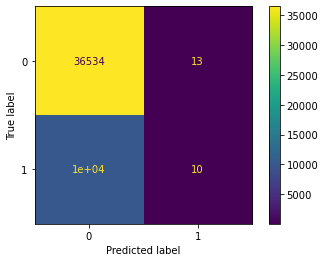

In [10]:
#%% Model Evalutation

#%% Scores – Metrics.
accuracy = our_model.score(x_test, y_test)        # Accuracy, 78%.
conf_mat = confusion_matrix(y_test, predictions)  # confusion_matrix( , ), first arg is actual y_test data, second arg is predictions made.
plot_confusion_matrix(our_model, x_test, y_test)  # plot_confusion_matrix( ,  , ) first arg is the model, second x_test, third y_test.

# Plot Confusion Matrix
tn = conf_mat[0][0]   # So althoug our accuracy was high, this is example of why accuracy                # We could try choosing other features
fp = conf_mat[0][1]   # is not alone the best perfromance indicator. Our model is just predicting        # for our model.
fn = conf_mat[1][0]   # most loans are not defaults. But there are many actual loan defaults escaping
tp = conf_mat[1][1]   # out predictions. Specifically, 10074 of them. (False Negatives).

print ("True Negatives (Correct Non-Defaults):", tn)    # print True Negatives
print ("False Positives (Incorrect Defaults):", fp)     # print False Positives
print ("False Negatives (Incorrect Non-Defaults):", fn) # print False Negatives
print ("True Positives (Correct Defaults)", tp)         # print True Positives

#### Precision and the ROC Curve

          Prob. (0)     Prob. (1)
count  46631.000000  46631.000000
mean       0.782566      0.217434
std        0.060468      0.060468
min        0.450563      0.014651
25%        0.744573      0.175410
50%        0.782854      0.217146
75%        0.824590      0.255427
max        0.985349      0.549437
                FPR           TPR
count  16388.000000  16388.000000
mean       0.466220      0.566298
std        0.283233      0.290113
min        0.000000      0.000000
25%        0.216926      0.325689
50%        0.467699      0.614240
75%        0.701959      0.820111
max        1.000000      1.000000
AUC: 0.5986814026467492


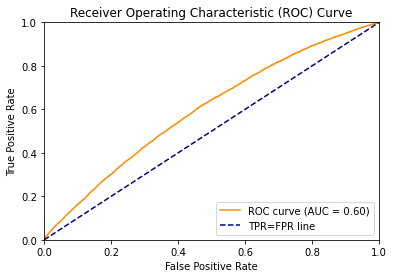

In [11]:
precision = precision_score(y_test, predictions) # Precision,  43%.
recall = recall_score(y_test, predictions)       # Recall,  0.099%.
f1 = f1_score(y_test, predictions)               # f1_score, 0.19%.

#%% The ROC curve – Model Evaluation.
# We can plot the ROC curve and calculate the area underneath it (AUC)
probs = our_model.predict_proba(x_test) # We use sklearn .predict_proba() function.
probs_df = pd.DataFrame()
probs_df['Prob. (0)'] = probs[:, 0]     # Here we built df with probabilities for defualt (1) and non-default (0).
probs_df['Prob. (1)'] = probs[:, 1]     # If we now apply to our df 'probs_df.describe()' we'll see the summary stats.
print(probs_df.describe())              # In those, we note max for 'Prob. (1)' is 54%. Which means the maximum prob. for
                                        # any row in our data to be default is 54%. This is low, makes it hard for our model. 
# ROC curve    
fpr, tpr, threshold = roc_curve(y_test, probs[:, 1], pos_label=1)
    # roc_curve(), arguments are actual y vals 'y_test', 'positive (default) problty.', 'positives label' (1 in our case means postive for default). 
roc_df = pd.DataFrame()
roc_df['FPR'] = fpr         # Results.
roc_df['TPR'] = tpr         # Organize in dataframe.
print(roc_df.describe())    # Understand roc results with .describe()
# This is giving us all info regarding TruePositiveRate (TPR) and FalsePositiveRate (FPR)

# Area under the Curve – AUC
roc_auc = auc(fpr, tpr) # A random classifier has AUC = 0.5. Ours is slghtly over, which is indeed better. Think: ROC Graph more inclined towards TPR.
print('AUC:', roc_auc)

#%% The ROC curve – Plotting.
plt.figure(2)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc) # Formatted to Plot our roc_auc value.
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='TPR=FPR line')      # Line where TPR=FPR.
plt.xlim([0, 1])         # The brackets [0, 1], [0, 1] means the line             # "fpr"  goes in x-axis. "tpr" goes in y-axis.
plt.ylim([0, 1])         # starts at (0, 0) and ends in (1, 1).
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right") # Specify where you want the legend located.
plt.show()

#### Advanced Evaluation – Prediction Percentages, resuable function

In [12]:
#%% Advanced Evaluation – Prediction Percentages.
results_df = pd.DataFrame()                         # Results Dataframe
results_df['true_class'] = y_test
results_df['predicted_class'] = list(predictions)   # Converting our model predictions from an array
results_df['default_prob'] = probs[:, 1]            # to a lsit. (Easier to assign to a dataframe column).

results_df.groupby('true_class')['predicted_class'].value_counts(normalize=True)
    # This gives us 3 columns: true_class, predicted_class, and the %. It's telling as 99.9% of out true non-defaults
    # were succesfully predicted as such. It is also saying 99.9% of our true defualts were wrongfully predicted as non-defaults.

#%% Reusable Model Evaluation Function 

def eval_model(model_name, x_test, y_test):  # Takes inputs model_name, x_test data, and y_test data.
    predictions = model_name.predict(x_test) # Predicted Values
    probs = model_name.predict_proba(x_test) # Predicted Probabilities 
    
    # Metrics (Scores)
    accuracy = model_name.score(x_test, y_test)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions) 
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("f1 score:", f1)
    
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, predictions)
    plot_confusion_matrix(model_name, x_test, y_test)
    
    tn = conf_mat[0][0]  # True Negatives 
    fp = conf_mat[0][1]  # False Positives
    fn = conf_mat[1][0]  # False Negatives 
    tp = conf_mat[1][1]  # True Positives
    print ("True Negatives (Correct Non-Defaults):", tn)    # print True Negatives
    print ("False Positives (Incorrect Defaults):", fp)     # print False Positives
    print ("False Negatives (Incorrect Non-Defaults):", fn) # print False Negatives
    print ("True Positives (Correct Defaults):", tp) 
    
    # The ROC curve
    probs_df = pd.DataFrame()            # Probability 'probs' (0 or 1) dataframe.
    probs_df['Prob. (0)'] = probs[:, 0]     
    probs_df['Prob. (1)'] = probs[:, 1] 
    print(probs_df.describe())           # Descirptive Stats for out Probability for (0 or 1)
    
    fpr, tpr, threshold = roc_curve(y_test, probs[:, 1], pos_label=1) # Generate ROC curve
    roc_auc = auc(fpr, tpr)              # auc() function (area under curve).
    print("Arean under ROC curve (AUC):", roc_auc)
    
    plt.figure(2)                        # Plotting ROC Graph
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc) # Formatted to Plot our roc_auc value.
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='TPR=FPR line')      # Line where TPR=FPR.
    plt.xlim([0, 1])                     # "fpr"  goes in x-axis. "tpr" goes in y-axis.
    plt.ylim([0, 1])                     # starts at (0, 0) and ends in (1, 1).
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right") 
    plt.show()
    
    # Prediction Percentages
    results_df = pd.DataFrame()                         # Results Dataframe
    results_df['true_class'] = y_test                   # Compares: y_test, predictions, probability for each row. 
    results_df['predicted_class'] = list(predictions)   # Converting our model predictions from array to list.
    results_df['default_prob'] = probs[:, 1]   
    pred_percentages = results_df.groupby('true_class')['predicted_class'].value_counts(normalize=True)
    print(pred_percentages)                             # Finally, see true class vs predicted class as a percentage (%)

# Now we can evaluate any binary classification model with eval_model() and this function.

Accuracy: 0.7836846732860114
Precision: 0.43478260869565216
Recall: 0.0009916699722332407
f1 score: 0.0019788265558523793
True Negatives (Correct Non-Defaults): 36534
False Positives (Incorrect Defaults): 13
False Negatives (Incorrect Non-Defaults): 10074
True Positives (Correct Defaults): 10
          Prob. (0)     Prob. (1)
count  46631.000000  46631.000000
mean       0.782566      0.217434
std        0.060468      0.060468
min        0.450563      0.014651
25%        0.744573      0.175410
50%        0.782854      0.217146
75%        0.824590      0.255427
max        0.985349      0.549437
Arean under ROC curve (AUC): 0.5986814026467492


/Users/pjaram84/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


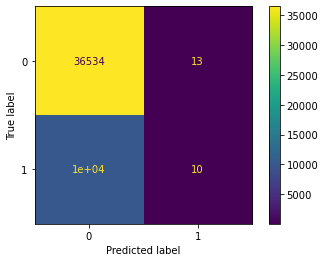

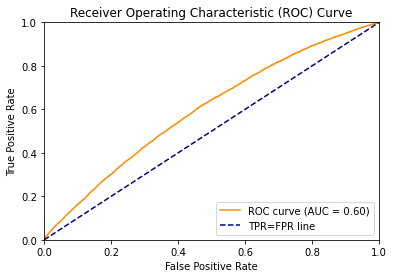

true_class  predicted_class
0           0                  0.999644
            1                  0.000356
1           0                  0.999008
            1                  0.000992
Name: predicted_class, dtype: float64


In [13]:
eval_model(our_model, x_test, y_test) # test it

In [14]:
#%% Summary
""" Summary: Model evaluation has both science and field knowledge. We 
    need to decide which type of errors do we want to minimize more, depending on our goal.
- Computed Metrics (scores): Accuracy, Precision, Model Recall, and f1 score.
- Calculated and Plotted a Confusion Matrix
- Calculated and Plotted ROC curve for our model
- Calculated and Printed Prediction Percentages
"""

' Summary: Model evaluation has both science and field knowledge. We \n    need to decide which type of errors do we want to minimize more, depending on our goal.\n- Computed Metrics (scores): Accuracy, Precision, Model Recall, and f1 score.\n- Calculated and Plotted a Confusion Matrix\n- Calculated and Plotted ROC curve for our model\n- Calculated and Printed Prediction Percentages\n'